In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [137]:
data = pd.read_csv("housing.csv")

data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [138]:
data.dropna(inplace=True) # drop null values
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [139]:
from sklearn.model_selection import train_test_split

x = data.drop(['median_house_value'], axis=1)
y = data['median_house_value']

In [140]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [141]:
train_data = x_train.join(y_train)
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
13658,-117.29,34.06,7.0,1971.0,403.0,1336.0,423.0,4.5066,INLAND,111500.0
9617,-120.44,37.29,18.0,1260.0,268.0,576.0,263.0,1.7222,INLAND,101500.0
2855,-118.92,35.38,33.0,3122.0,579.0,1733.0,545.0,3.8307,INLAND,70600.0
3286,-122.53,39.09,11.0,1264.0,271.0,370.0,177.0,1.3000,INLAND,69700.0
13795,-117.42,34.59,8.0,5445.0,1360.0,3220.0,1214.0,1.7567,INLAND,69500.0
...,...,...,...,...,...,...,...,...,...,...
14065,-117.12,32.75,17.0,2060.0,633.0,1251.0,602.0,1.9886,NEAR OCEAN,119200.0
7242,-118.12,34.01,40.0,1417.0,338.0,1068.0,331.0,2.4259,<1H OCEAN,164600.0
20278,-119.20,34.19,19.0,9503.0,1769.0,6370.0,1718.0,5.0016,NEAR OCEAN,218500.0
87,-122.27,37.81,10.0,875.0,348.0,546.0,330.0,0.7600,NEAR BAY,162500.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

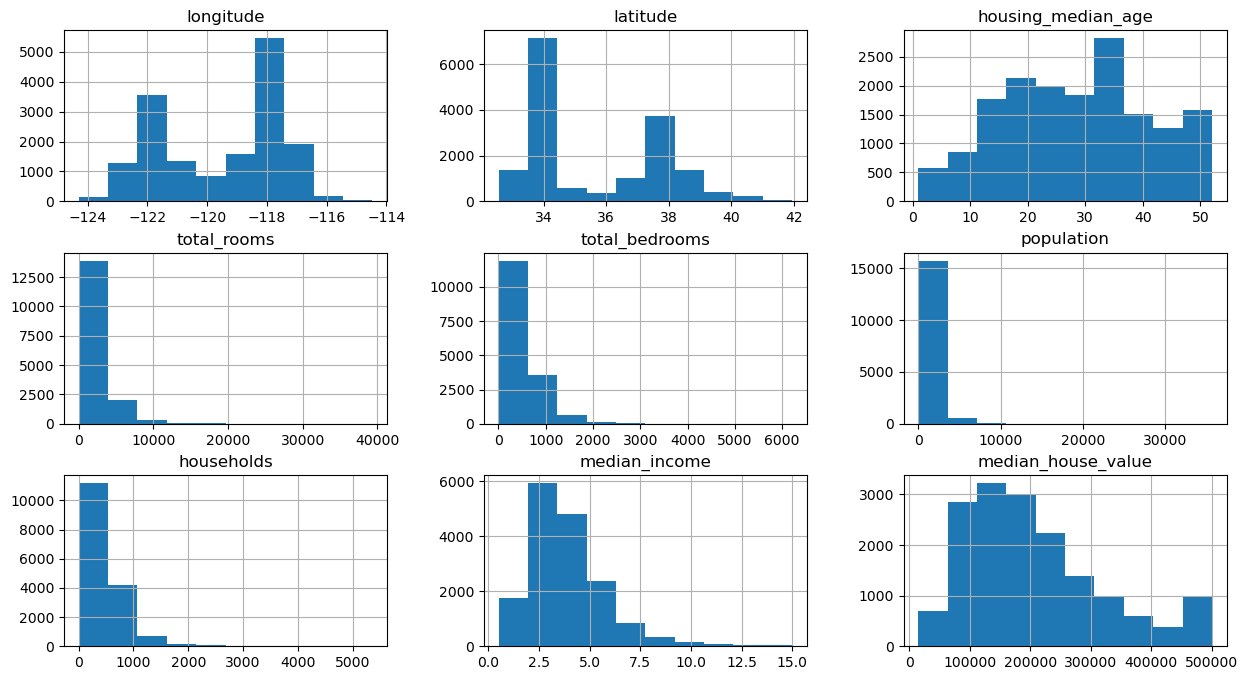

In [142]:
train_data.hist(figsize=(15, 8))

<Axes: >

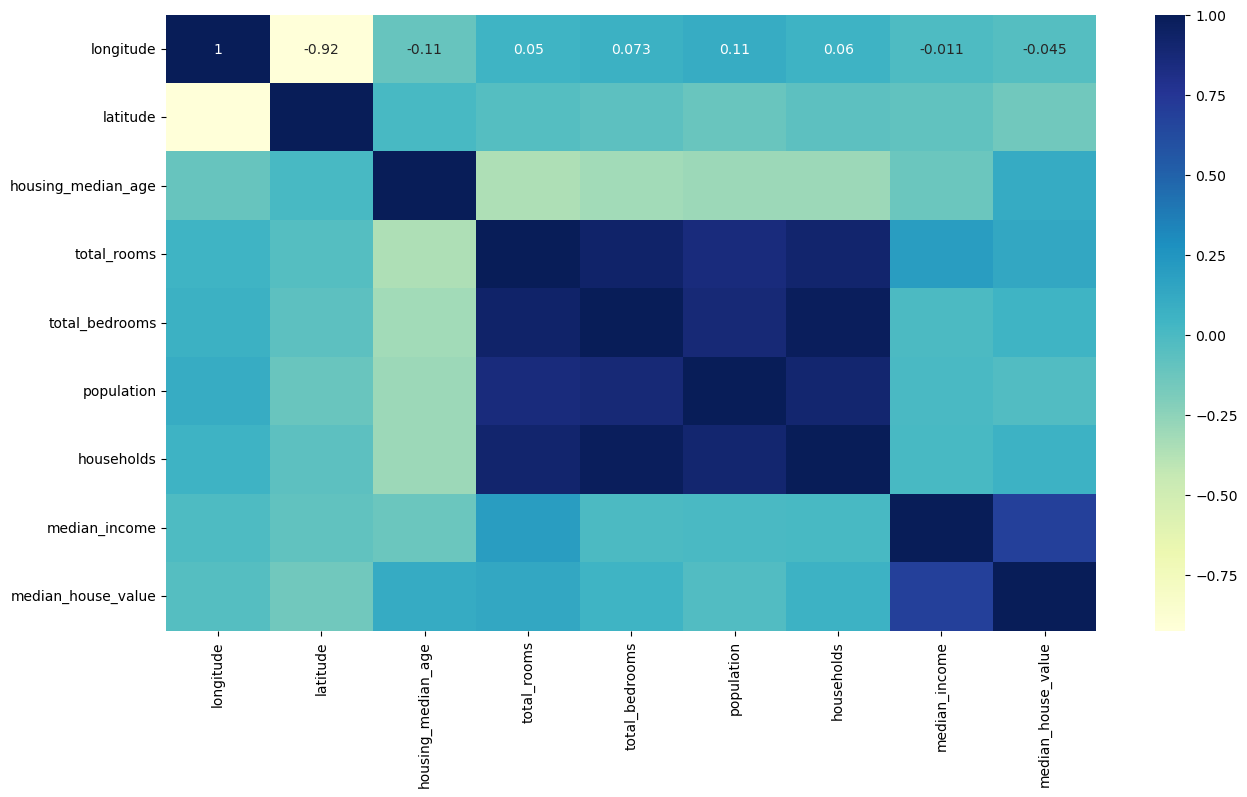

In [143]:
train_data_no_ocean = train_data.drop(['ocean_proximity'], axis=1)
plt.figure(figsize=(15,8))
sns.heatmap(train_data_no_ocean.corr(), annot=True, cmap="YlGnBu")

In [144]:
train_data_no_ocean.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924449,-0.109882,0.050356,0.073305,0.105063,0.060236,-0.010789,-0.044726
latitude,-0.924449,1.000000,0.010923,-0.040498,-0.069765,-0.112884,-0.074692,-0.084571,-0.146278
housing_median_age,-0.109882,0.010923,1.000000,-0.359859,-0.318728,-0.294737,-0.300411,-0.124010,0.109479
total_rooms,0.050356,-0.040498,-0.359859,1.000000,0.930217,0.852371,0.916576,0.199432,0.132167
total_bedrooms,0.073305,-0.069765,-0.318728,0.930217,1.000000,0.873934,0.978422,-0.007285,0.048712
population,0.105063,-0.112884,-0.294737,0.852371,0.873934,1.000000,0.904626,0.006845,-0.026239
households,0.060236,-0.074692,-0.300411,0.916576,0.978422,0.904626,1.000000,0.013797,0.064620
median_income,-0.010789,-0.084571,-0.124010,0.199432,-0.007285,0.006845,0.013797,1.000000,0.685480
median_house_value,-0.044726,-0.146278,0.109479,0.132167,0.048712,-0.026239,0.064620,0.685480,1.000000


In [145]:
# take log of skewed values
train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1)
train_data['population'] = np.log(train_data['population'] + 1)
train_data['households'] = np.log(train_data['households'] + 1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

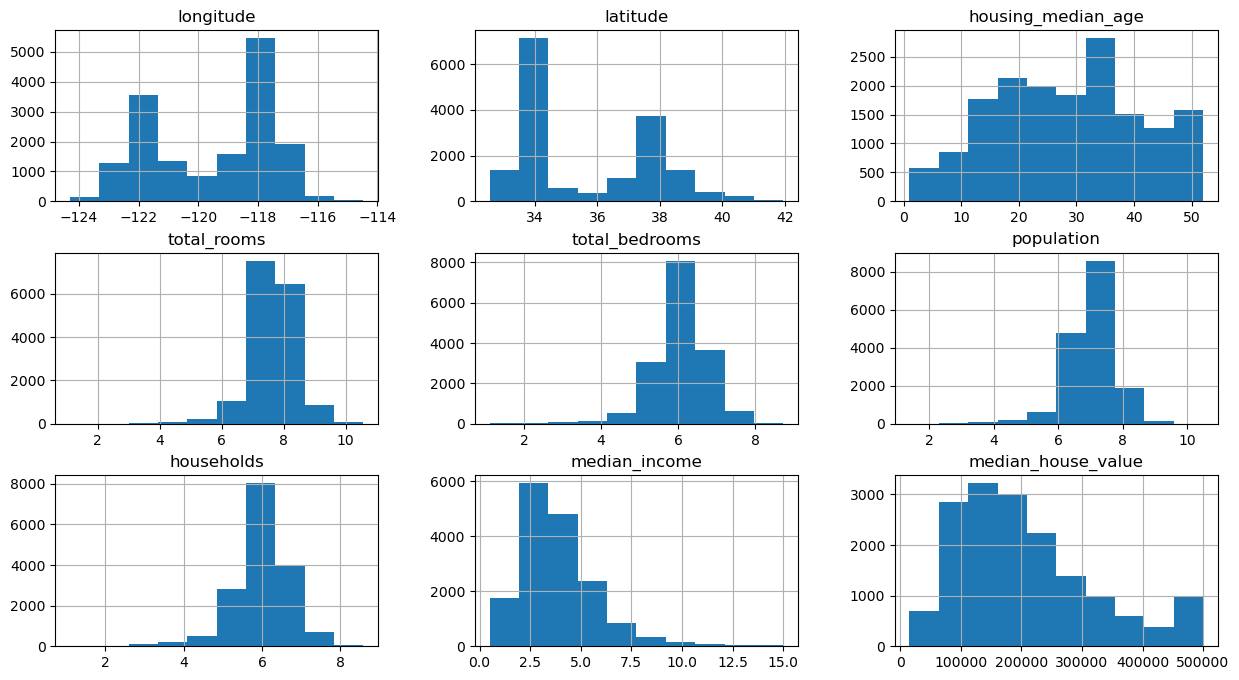

In [146]:
train_data.hist(figsize=(15,8))

In [147]:
train_data.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     7199
INLAND        5183
NEAR OCEAN    2123
NEAR BAY      1838
ISLAND           3
Name: count, dtype: int64

In [148]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'], axis = 1)
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
13658,-117.29,34.06,7.0,7.586804,6.001415,7.198184,6.049733,4.5066,111500.0,False,True,False,False,False
9617,-120.44,37.29,18.0,7.139660,5.594711,6.357842,5.575949,1.7222,101500.0,False,True,False,False,False
2855,-118.92,35.38,33.0,8.046549,6.363028,7.458186,6.302619,3.8307,70600.0,False,True,False,False,False
3286,-122.53,39.09,11.0,7.142827,5.605802,5.916202,5.181784,1.3000,69700.0,False,True,False,False,False
13795,-117.42,34.59,8.0,8.602637,7.215975,8.077447,7.102499,1.7567,69500.0,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14065,-117.12,32.75,17.0,7.630947,6.452049,7.132498,6.401917,1.9886,119200.0,False,False,False,False,True
7242,-118.12,34.01,40.0,7.257003,5.826000,6.974479,5.805135,2.4259,164600.0,True,False,False,False,False
20278,-119.20,34.19,19.0,9.159468,7.478735,8.759512,7.449498,5.0016,218500.0,False,False,False,False,True
87,-122.27,37.81,10.0,6.775366,5.855072,6.304449,5.802118,0.7600,162500.0,False,False,False,True,False


<Axes: >

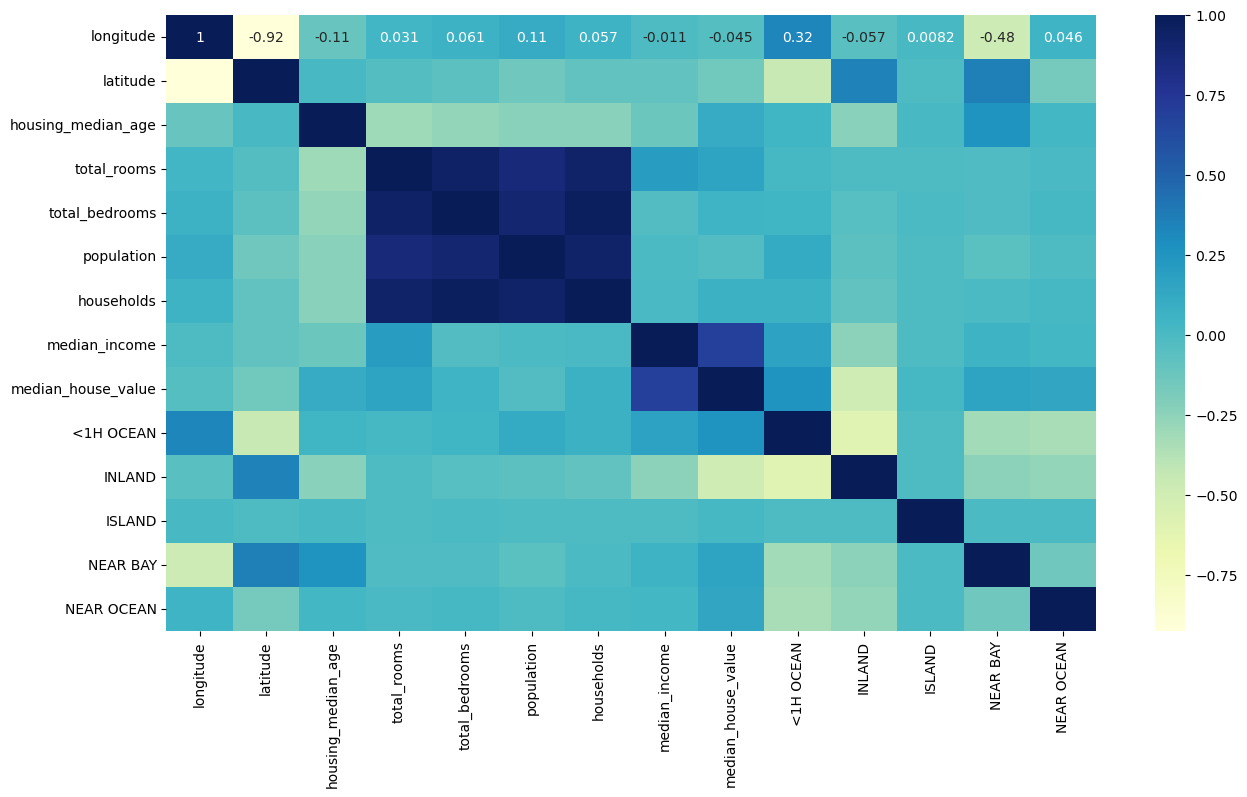

In [149]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

<Axes: xlabel='latitude', ylabel='longitude'>

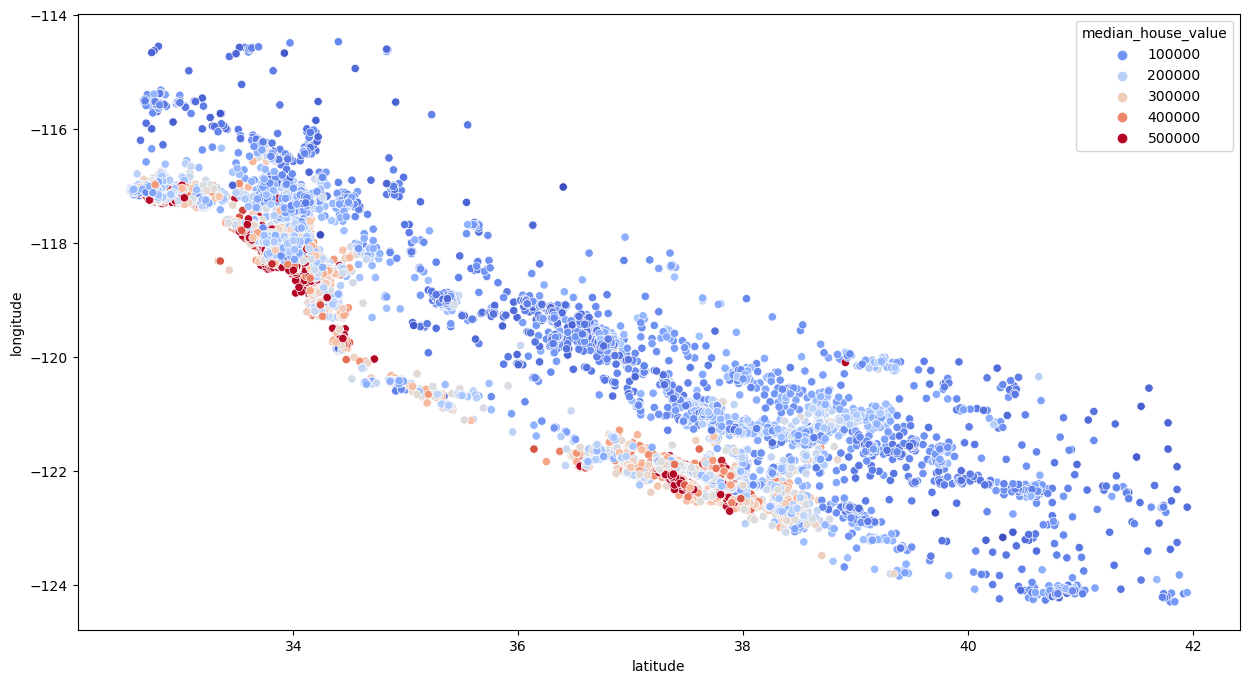

In [150]:
plt.figure(figsize=(15, 8))
sns.scatterplot(x="latitude", y="longitude", data=train_data, hue="median_house_value", palette="coolwarm")

In [151]:
train_data['bedroom_ratio'] = train_data['total_bedrooms'] / train_data['total_rooms']
train_data['household_rooms'] = train_data['total_rooms'] / train_data['households']

<Axes: >

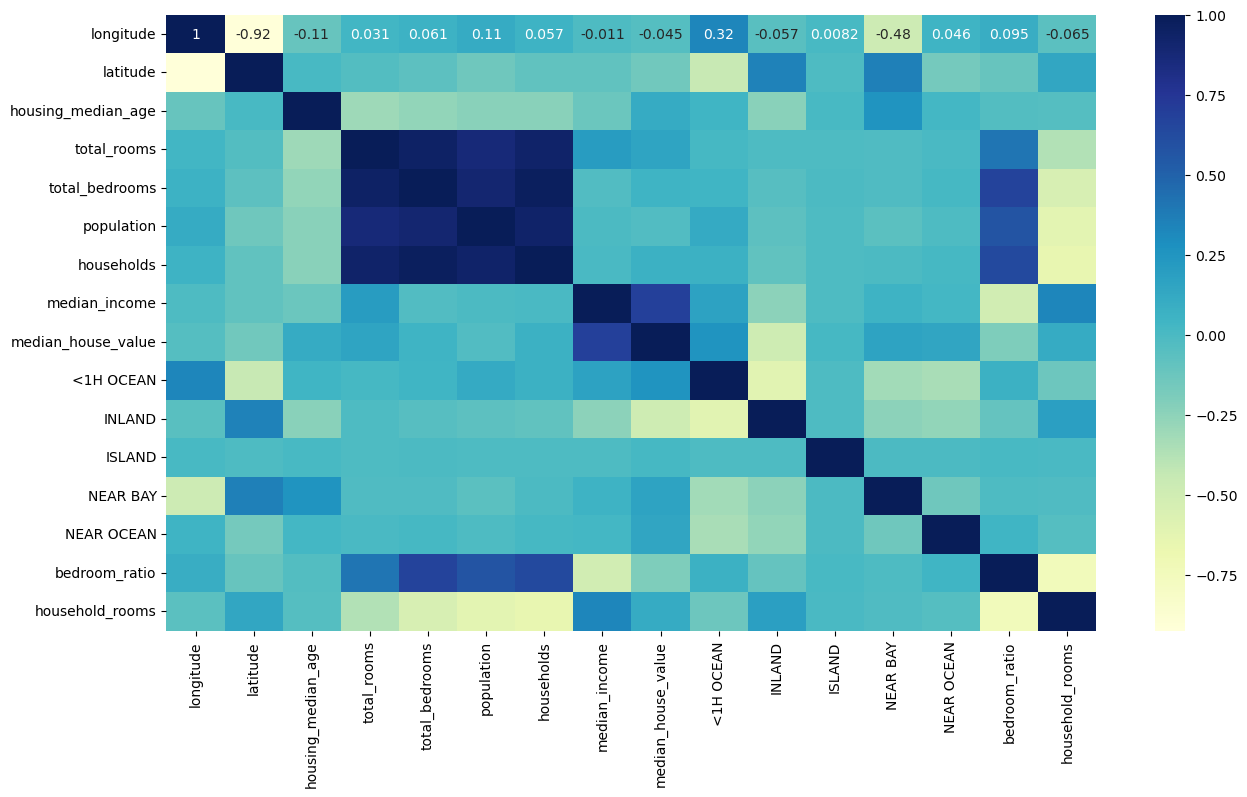

In [152]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

In [153]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train, y_train = train_data.drop(['median_house_value'], axis=1), train_data['median_house_value']
x_train_s = scaler.fit_transform(x_train)

reg = LinearRegression()

reg.fit(x_train_s, y_train)

LinearRegression()

In [154]:
test_data = x_test.join(y_test)

test_data['total_rooms'] = np.log(test_data['total_rooms'] + 1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] + 1)
test_data['population'] = np.log(test_data['population'] + 1)
test_data['households'] = np.log(test_data['households'] + 1)

test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)

test_data['bedroom_ratio'] = test_data['total_bedrooms'] / test_data['total_rooms']
test_data['household_rooms'] = test_data['total_rooms'] / test_data['households']


In [155]:
x_test, y_test = test_data.drop(['median_house_value'], axis=1), test_data['median_house_value']
x_test_s = scaler.transform(x_test)

In [156]:
reg.score(x_test_s, y_test)

0.6732877825216752

In [160]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()

forest.fit(x_train_s, y_train)

RandomForestRegressor()

In [161]:
forest.score(x_test_s, y_test)

0.8177054763594629

In [162]:
from sklearn.model_selection import GridSearchCV

forest = RandomForestRegressor()

param_grid = { # goes through all combs (3&2, 3&4, 3&6,...)
    "n_estimators": [100, 200, 300],
    # "max_features": [2, 4, 6, 8], 
    "min_samples_split": [2, 4],
    "max_depth": [None, 4, 8]
}

grid_search = GridSearchCV(forest, param_grid, cv=5, scoring = "neg_mean_squared_error", return_train_score=True)

grid_search.fit(x_train_s, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': [2, 4, 6, 8],
                         'n_estimators': [3, 10, 30]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [165]:
best_forest = grid_search.best_estimator_

In [166]:
best_forest.score(x_test_s, y_test)

0.8153012660179109